In [1]:
import scipy
from scipy.optimize import minimize_scalar
import numpy as np
import matplotlib.pyplot as plt

### Minimizing a function with one Variable (1D Optimization)

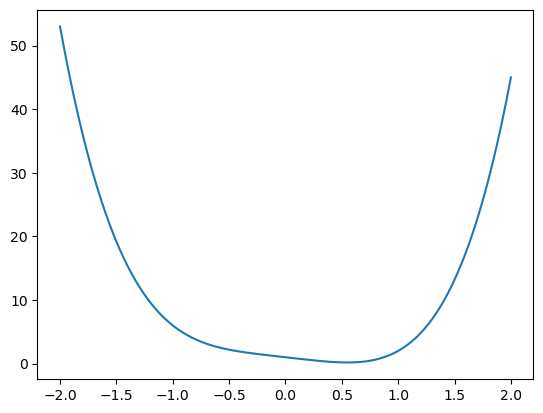

In [17]:
# Objective function
def objecivefunction1(x):
    return 3 * x ** 4 - 2 * x + 1

#plotting the objective function
x = np.linspace(-2, 2, 100)
plt.plot(x, objecivefunction1(x))
plt.show()

In [15]:
# minimize_scalar() is used for 1D optimization problems
res = minimize_scalar(objecivefunction1)

In [16]:
print(res)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 0.17451818777634331
       x: 0.5503212087491959
     nit: 12
    nfev: 15

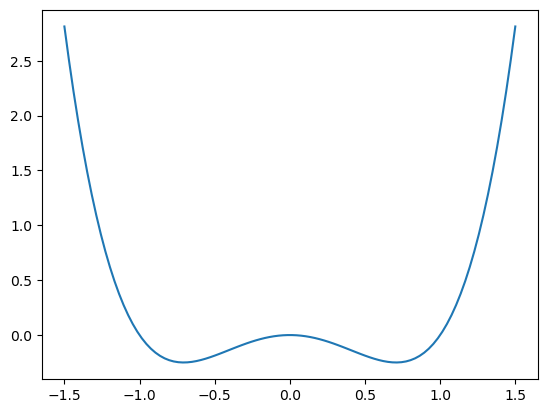

In [2]:
def objecivefunction2(x):
    return x ** 4 - x ** 2

#plotting the objective function
x = np.linspace(-1.5, 1.5, 100)
plt.plot(x, objecivefunction2(x))
plt.show()

In [3]:
res = minimize_scalar(objecivefunction2)
res

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -0.24999999999999994
       x: 0.7071067853059209
     nit: 11
    nfev: 14

In [5]:
res = minimize_scalar(objecivefunction2, bracket=(-1,0))
res

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -0.24999999999999997
       x: 0.7071067809244586
     nit: 13
    nfev: 16

In [12]:
res = minimize_scalar(objecivefunction2, bounds=(-1,0), method='bounded')
res

 message: Solution found.
 success: True
  status: 0
     fun: -0.24999999999998732
       x: -0.707106701474177
     nit: 10
    nfev: 10

### Stock Sales Problem - Maximizing the total income from the sale of a fixed number of stocks
- Constrained Optimization Problem: 
    - 1 Linear Constraint : The sum of total shares purchased by the buyers does not exceed the number of shares the broker has on hand.
    - Each buyer has an upper bound of cash available, and a lower bound of 0. 

In [47]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint

np.random.seed(0)
n_buyers = 10
n_shares = 15

In [48]:
# array of prices each buyer is willing to pay for the stock
prices = np.random.uniform(0, 1, size=n_buyers)

# total cash available for each buyer to buy the stock
money_available = np.random.randint(1, 4, size=n_buyers)

# max number of shares each buyer can purchase
n_shares_per_buyer = money_available // prices
print(prices, money_available, n_shares_per_buyer, sep='\n')

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152]
[3 3 1 2 2 2 2 1 2 1]
[5. 4. 1. 3. 4. 3. 4. 1. 2. 2.]


In [41]:
# creating the constraints and bounds for the solver   

# constraint: sum of shares bought by all buyers can't exceed the total number of shares(n_shares),  i.e x[0] + x[1] + ... + x[n] <= n_shares
# LinearConstraint takes the dot product of the input array and the decision variables and compares it to the lower and upper bounds
constraint = LinearConstraint(np.ones(n_buyers), lb=0, ub=n_shares) # inequality constraint (lb <= x (input array) <= ub)

# Creating the bounds for the decision variables. Each decision variable has a lower bound of 0 and an upper bound of the max number of shares each buyer can purchase (n_shares_per_buyer)
# i.e 0 <= x[0] <= n_shares_per_buyer[0], 0 <= x[1] <= n_shares_per_buyer[1], ... , 0 <= x[n] <= n_shares_per_buyer[n]
# Format that minimize() expects for bounds is a sequece of tupples of lb and ub: i.e. (min, max) pairs for each element in the decision variable array
bounds = [(0, n) for n in n_shares_per_buyer]

# objective function: maximize the total amount of money made by selling the shares
# min -f(x) = max f(x) ;  min -(prices[0] * x[0] + prices[1] * x[1] - ... + prices[n] * x[n]) 
# x.dot(prices) is the dot product of the decision variables and the prices
def objective_function(x, prices):
    return -x.dot(prices)

In [42]:
# Solve the model
result = minimize(
    objective_function,
    x0=10 * np.random.random(n_buyers), # initial guess for the decision variables
    args=(prices,), # additional arguments passed to the objective function and constraint
    constraints=constraint,
    bounds=bounds
)

print(result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -11.234415206041533
       x: [ 3.630e-14  2.000e+00  1.000e+00  3.000e+00  1.000e+00
            3.000e+00  3.000e+00  1.000e+00  2.518e-13  1.000e+00]
     nit: 9
     jac: [-2.022e-02 -8.326e-01 -7.782e-01 -8.700e-01 -9.786e-01
           -7.992e-01 -4.615e-01 -7.805e-01 -1.183e-01 -6.399e-01]
    nfev: 99
    njev: 9



- From the output above, the optimization terminated successfully (0 status), resulting in an income of $11.23 from the sale.

In [43]:
# check if the constraints and bounds are satisfied
print("The total number of shares sold is: ", result.x.sum())
print("Leftover money for each buyer: ", money_available - result.x * prices)

The total number of shares sold is:  14.999999999999838
Leftover money for each buyer:  [2.         0.33476031 0.22184325 0.38996356 0.02138166 0.60252431
 1.61556191 0.21947082 3.         0.36007898]


#### Possible infeasible situations: 
- Situations where the solver can´t find a solution, satisfying all of the constraints and bounds

In [49]:
n_shares = 1000
n_buyers = 15
prices = np.random.uniform(0, 1, size=n_buyers)
money_available = np.random.randint(1, 10, size=n_buyers)
n_shares_per_buyer = money_available // prices
# modifying the inequality constraint to an equality constraint
constraint = LinearConstraint(np.ones(n_buyers), lb=n_shares, ub=n_shares)
bounds = [(0, n) for n in n_shares_per_buyer]

In [50]:
result = minimize(
    objective_function,
    x0=10 * np.random.random(n_buyers),
    args=(prices,),
    constraints=constraint,
    bounds=bounds
)

print(result)

 message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: -68.88374945416506
       x: [ 1.480e+02  9.000e+00 ...  2.100e+01  7.000e+00]
     nit: 15
     jac: [-2.022e-02 -8.326e-01 ... -4.147e-01 -2.646e-01]
    nfev: 225
    njev: 11


In [51]:
print("The total number of shares sold is: ", result.x.sum())
print("Leftover money for each buyer: ", money_available - result.x * prices)

The total number of shares sold is:  333.9999999999993
Leftover money for each buyer:  [0.00767718 0.50642139 0.66552975 0.12998785 0.02138166 0.20504861
 0.00076829 0.53629577 0.02180887 0.0411057  0.12598823 0.11066217
 0.3033651  0.29209926 0.14811072]
